# 04 – Classification Models

**Objective:**  
Train and evaluate classification models to predict diabetes outcome based on
preprocessed clinical features.

This notebook builds on:
- Data cleaning (Collaborator 1)
- EDA & feature selection (Collaborator 2)
- Normalization & scaling (Collaborator 3)

We focus on supervised classification and model evaluation.


## Inputs / Outputs

**Input:**
- Normalized dataset produced in `03_Normalization.ipynb`
  (`diabetes_all_columns_normalized.csv`)

**Output:**
- Trained classification model(s)
- Performance metrics (accuracy, precision, recall, F1-score)


## 1 – Setup, Imports & Dataset Load

In this section, we load the normalized dataset and separate predictors from
the binary target variable (`outcome`).


In [6]:
!git clone https://github.com/noeliamg227/diabetes-prediction.git


Cloning into 'diabetes-prediction'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 140 (delta 20), reused 25 (delta 10), pack-reused 88 (from 1)
Receiving objects: 100% (140/140), 2.07 MiB | 14.64 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [7]:
%cd diabetes-prediction

/content/diabetes-prediction


In [8]:
import pandas as pd

df = pd.read_csv("data/processed/diabetes_all_columns_normalized.csv")
df.head()


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,0.678427,0.866045,-0.009945,1.164623,-0.675172,0.218695,0.813594,1.560400,1
1,-0.851320,-1.205066,-0.562070,0.363401,-0.675172,-0.873966,-0.312924,-0.159340,0
2,1.290326,2.016662,-0.746112,-0.437820,-0.675172,-1.389077,0.997265,-0.068827,1
3,-0.851320,-1.073567,-0.562070,-0.437820,0.389860,-0.639824,-1.063936,-1.064466,0
4,-1.157270,0.504422,-2.954614,1.164623,1.631000,1.701591,-0.225170,0.021685,1


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



## 2. Feature–Target Separation and Train/Test Split

In this section, we separate predictors from the target variable and split the dataset into training and testing sets. A stratified split is used to preserve the class distribution of the outcome variable.



In [9]:
X = df.drop(columns=["outcome"])
y = df["outcome"]

X.shape, y.shape


((768, 8), (768,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((614, 8), (154, 8))

The dataset was split into 80% training data and 20% testing data. Stratification ensures that the proportion of diabetic and non-diabetic patients remains consistent across both sets, which is important given the class imbalance in the dataset.


## 3. K-Nearest Neighbors (KNN) Classification

In this section, we implement a K-Nearest Neighbors (KNN) classifier to predict diabetes outcomes.
KNN is a distance-based algorithm that assigns a class based on the majority label of the k nearest observations in the feature space.
Because KNN relies on distance calculations, using a normalized dataset is essential.


In [11]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train);


In [ ]:
# Predict on test set
y_pred = knn.predict(X_test)

y_pred[:10]


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

The KNN model was trained using k = 5 neighbors.
This value represents a common starting point that balances model stability and sensitivity to local patterns.


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6753246753246753

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.81      0.76       100
           1       0.55      0.43      0.48        54

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.66      0.68      0.66       154



## 4. Model Tuning & Comparison

In this section, we tune the KNN classifier and compare it with other common classification models:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)

All models are trained on the same normalized dataset and evaluated on the same test split.


In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, y_pred_k))


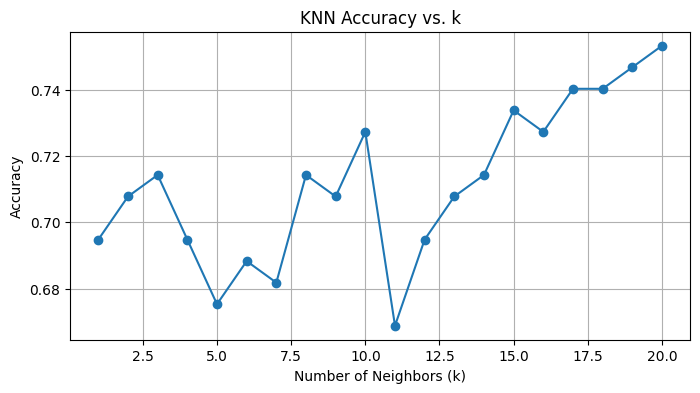

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.grid(True)
plt.show()


### KNN Hyperparameter Analysis

The figure shows test accuracy as a function of the number of neighbors (k).
Lower k values result in higher variance and unstable performance, while larger k values
lead to smoother decision boundaries and improved generalization.

The best performance is achieved at k = 20, with an accuracy of approximately 0.75.
This tuned KNN model is therefore used for subsequent comparisons.


## 5 – Final KNN Model

Based on the hyperparameter analysis, a value of k = 20 provides the best test accuracy
and improved stability. This configuration is used as the final KNN model and evaluated
using standard classification metrics.




In [ ]:
# Final KNN model with optimal k
knn_final = KNeighborsClassifier(n_neighbors=20)

knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

# Evaluation
print("KNN Classification Report (k=20):\n")
print(classification_report(y_test, y_pred_knn))

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Classification Report (k=20):

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.46      0.57        54

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

KNN Accuracy: 0.7532467532467533


The tuned KNN model achieves an accuracy of approximately 0.75 on the test set.
Performance is stronger for the non-diabetic class, while recall for the diabetic class
remains lower. This reflects the class imbalance present in the dataset and motivates
comparison with other classification approaches.


## 6 – Logistic Regression

Logistic Regression is used as a linear baseline model. It is widely applied in medical
classification tasks due to its interpretability and probabilistic output.


In [ ]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

Logistic Regression Accuracy: 0.6948051948051948


##7 Support Vector Machine (SVM)

Support Vector Machines aim to find an optimal decision boundary that maximizes the margin
between classes. Since SVMs are sensitive to feature scales, we use the standardized
features produced earlier.


In [ ]:

# Initialize SVM with RBF kernel
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Train model
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", svm_accuracy)


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.64      0.46      0.54        54

    accuracy                           0.72       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154

SVM Accuracy: 0.7207792207792207


### SVM Interpretation

The Support Vector Machine with an RBF kernel achieved an accuracy of approximately 0.72,
outperforming Logistic Regression and the untuned KNN model.

The model shows strong performance in identifying non-diabetic patients (high recall for
class 0), while recall for diabetic patients remains lower, likely due to class imbalance.
Overall, SVM provides a good trade-off between bias and variance for this dataset.


## 8 Random Forest Classification

In this section, we evaluate a Random Forest classifier on the normalized diabetes dataset.
Random Forest is an ensemble method that combines multiple decision trees to improve
predictive performance and reduce overfitting.


In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Random Forest Accuracy: 0.7337662337662337


## 9 Model Comparison

In this section, we compare the performance of multiple classification models
trained on the normalized diabetes dataset. Accuracy is used as a primary metric,
while precision, recall, and F1-score provide insight into class-wise performance.


In [ ]:
# Collect model accuracies
model_results = pd.DataFrame({
    "Model": [
        "KNN (k=20)",
        "Logistic Regression",
        "SVM",
        "Random Forest"
    ],
    "Accuracy": [
        knn_accuracy,
        lr_accuracy,
        svm_accuracy,
        rf_accuracy
    ]
})

model_results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
0,KNN (k=20),0.753247
3,Random Forest,0.733766
2,SVM,0.720779
1,Logistic Regression,0.694805


## 10 Final Model Comparison

The tuned KNN model (k = 20) achieved the highest accuracy (≈ 0.75), followed by
Random Forest (≈ 0.73) and SVM (≈ 0.72). Logistic Regression showed the lowest
performance among the tested models.

Although KNN achieved the highest accuracy, Random Forest and SVM offer better
robustness and interpretability in clinical contexts.

In [40]:
!git add notebooks/04_Classification_Models.ipynb

